In this example, we will show how to create a very simple tissue structure comprised of cubic cells using multicell.

# Preparation

Visualizations rely on the matplotlib module. In order for visualizations to work interactively in this Jupyter notebook, we need to run the following command.

In [1]:
%matplotlib notebook

/home/jl/Library/Python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Imports
In Python, it is common practice to import the modules we will be using at the beginning of the script. To create a simple virtual tissue, we will need the multicell module.

In [2]:
import multicell

We then need to define the problem

# Problem definition

The simulation_builder module can then be used to create a virtual tissue, e.g. in this case a cubic cell grid.

In [3]:
sim = multicell.generate_cell_grid_sim (x=20,y=20, z=1, noise_amplitude=1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.41 s)


In [6]:
help(multicell.generate_cell_grid_sim)

Help on function generate_cell_grid_sim in module multicell.simulation_builder:

generate_cell_grid_sim(x, y=0, z=0, noise_amplitude=0.001, sim_class=<class 'multicell.simulation.Simulation'>)
    Builds a Simulation object with a grid-shaped tissue.
    
    Parameters
    ----------
        x : int
            Number of cells along the x axis
        y : int
            Number of cells along the y axis, not used if 0 (default: 0)
        z : int
            Number of cells along the z axis, not used if 0 (default: 0)
    
    Returns
    -------
        Simulation
            Simulation object containing the grid.



Parameters x, y and z are the dimensions of the cell grid. noise_level introduces some randomness in the position of the vertices (a uniformly distributed noise between –noise_level and +noise_level is added to each coordinate of each vertex).
The grid produced is regular (except for the small random noise). Hence, all cells have identical sizes measured in arbitrary units, with sides of 1 unit-long. The neighbors of a cell will be those cells in direct contact. For this simple case, since we have a single layer of identical and aligned cells, each cell will have between two and four neighbor cells, depending on its position in the grid and the contact surface of any two adjacent cells will always be equal to 〖1 unit〗^2 (Fig. 1). All cells also have a volume of 1 unit^3.
 
Fig 1. Basic tissue structure description.
To display the tissue call the display method provided by the plantgl_renderer module.

### Visualization section

<IPython.core.display.Javascript object>


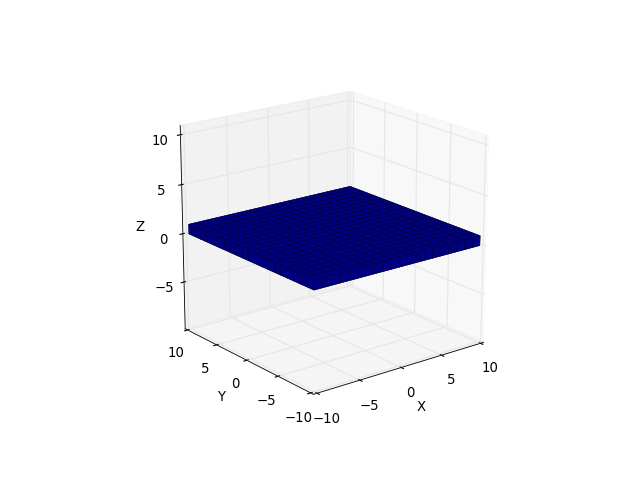

Max value displayed for None: 0


In [5]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer)
sim.renderer.display ()

This single-layer cell grid will be our starting point for the next examples.
Other types of virtual tissues could be created (e.g.: irregular grids, 3D grids with non planar geometries...), they simply need to be defined as an OpenAlea Topomesh object.